# Fuzzy-Wuzzy Logic for Sorting Titles

In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline

import re
import datetime
from datetime import date
from time import strptime

import RAKE as rake
import operator


In [30]:
# First reading my resume csv
resume = pd.read_csv('resume_data/master_resume_data.csv')

###############################################################################
##  Resume Title Column 

This column is very important to any resume. On analysis, I find that there are lot of similar titles that appeared differently in this column like :
* Java developer
* java dev

I decided to resolve this issue by fuzzy-wuzzy 

###############################################################################

In [4]:
resume['Resume_title'].nunique()

4513

In [56]:
unique_title = resume['Resume_title'].unique().tolist()

In [57]:
len(unique_title)

4513

In [59]:
unique_title.sort()

In [60]:
from fuzzywuzzy import process, fuzz

C:\Users\shail\anaconda\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [1]:
#Create tuples of resume titles, matched titles names, and the score
title_score_sort = [(x,) + i
             for x in unique_title 
             for i in process.extract(x, unique_title, scorer=fuzz.token_sort_ratio)]
#Create a dataframe from the tuples
title_similarity_sort = pd.DataFrame(title_score_sort, columns=['title_orinigal','title_checked','title_score_sort'])

In [113]:
title_similarity_sort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22565 entries, 0 to 22564
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title_new         22565 non-null  object
 1   title_original    22565 non-null  object
 2   title_score_sort  22565 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 529.0+ KB


In [70]:
title_similarity_sort.head()

,title_original1,title_checked,title_score_sort
0,java developer,java developer,100
1,java developer,developer( java),100
2,java developer,java devloper,96
3,java developer,sr java developer,90
4,java developer,jr java developer,90


In [76]:
new_score = title_similarity_sort[title_similarity_sort['title_score_sort']>80]

In [77]:
new_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10056 entries, 0 to 22560
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title_original1   10056 non-null  object
 1   title_checked     10056 non-null  object
 2   title_score_sort  10056 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 314.2+ KB


In [66]:
title_similarity_sort=pd.read_csv('wip/resume_title.csv')

In [69]:
title_similarity_sort.rename({'title_new':'title_original1','title_original':'title_checked'},axis=1,inplace = True)

In [74]:
# resume['resume_title_new']=(title_similarity_sort['title_score_sort']>80
#                             & title_similarity_sort['title_checked'] == resume['Resume_title'], 
#                             title_similarity_sort['title_original1'] )

In [ ]:
for i in range(new_score.shape[0]):
    if new_score['title_score_sort'][i] >= 80 & new_score['title_checked'][i] is in new_score['title_new']:
        where new_score['title_original1']=[new_score['title_checked'][i]], replace with new_score['title_original1'][i]

In [ ]:
unique_original_titles=title_original.unique
unique_new_titles=title_new.unique
for title in title_old:
 if score >80:
    for unique in title_new:
    {unique: values where score>80}
     if values is in unique_original_titles:
        remove value from list

In [71]:
resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14428 entries, 0 to 14427
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   index                   14428 non-null  int64 
 1   Resume_title            14428 non-null  object
 2   City                    14428 non-null  object
 3   location                14428 non-null  object
 4   Description             14428 non-null  object
 5   work_experiences        14428 non-null  object
 6   Educations              14428 non-null  object
 7   Skills                  14428 non-null  object
 8   Links                   14428 non-null  object
 9   Certificates            14428 non-null  object
 10  Additional Information  14428 non-null  object
 11  is_grad                 14428 non-null  int64 
 12  is_postgrad             14428 non-null  int64 
 13  is_doc                  14428 non-null  int64 
 14  edu_unknown             14428 non-null  int64 
 15  Co

In [115]:
title_similarity_sort['title_original'].nunique()

4503

In [116]:
title_similarity_sort['title_new'].nunique()

4513

In [140]:
title_similarity_sort.to_csv('resume_title.csv', index=False)

## Initially,  I choose to go for 4 different resume titles 
1. Java
2. .net
3. python
4. php

In [232]:
# pullin java
resume_java = resume.loc[resume['Resume_title'].str.contains('java', na=False)]
resume_java.to_csv('resume_java.csv', index=False)
resume_java['Resume_title'] = 'java developer'
resume.loc[resume.Resume_title.str.contains('java', na=False), "Resume_title"] = "java developer"

C:\Users\shail\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [233]:
### Now .net 
resume_net = resume.loc[resume['Resume_title'].str.match('\.net.*dev|dev.*\.net')]
resume_net.to_csv('resume_net.csv', index=False)
resume_net['Resume_title'] = '.net developer'
resume.loc[resume['Resume_title'].str.match('\.net.*dev|dev.*\.net'), "Resume_title"] = ".net developer"

C:\Users\shail\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [234]:
### Now python
resume_python = resume.loc[resume['Resume_title'].str.match('python.*dev|dev.*python')]
resume_python.to_csv('resume_python.csv', index=False)
resume_python['Resume_title'] = 'python developer'
resume.loc[resume['Resume_title'].str.match('python.*dev|dev.*python'), "Resume_title"] = "python developer"


C:\Users\shail\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [235]:
### Now php
resume_php = resume.loc[resume['Resume_title'].str.match('php.*dev|dev.*php')]
resume_php.to_csv('resume_php.csv', index=False)
resume_php['Resume_title'] = 'php developer'
resume.loc[resume['Resume_title'].str.match('php.*dev|dev.*php'), "Resume_title"] = "php developer"

C:\Users\shail\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [245]:
t= resume.copy()
t.to_csv('resume with 4 titles worked.csv', index=False)

In [236]:
resume['Resume_title'].value_counts()

php developer                                                                                                                                                                                                      1516
java developer                                                                                                                                                                                                     1477
python developer                                                                                                                                                                                                   1113
software developer                                                                                                                                                                                                  965
developer                                                                                                                               

In [237]:
r_df = pd.concat([resume_java,resume_net,resume_python,resume_php],ignore_index=True)

In [239]:
r_df.to_csv('r_df.csv', index=False)

In [240]:
r_df['Resume_title'].value_counts()

php developer       1516
java developer      1477
python developer    1113
.net developer        43
Name: Resume_title, dtype: int64

Text(0, 0.5, 'Number of Jobs')

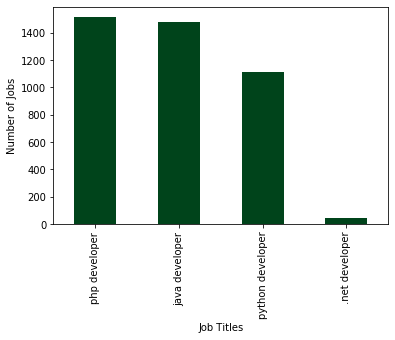

In [243]:
r_df['Resume_title'].value_counts().plot(cmap='Greens_r',kind='bar')
plt.xlabel("Job Titles")
#plt.xticks(rotation=0)
plt.ylabel("Number of Jobs")

Text(0, 0.5, 'Number of Jobs')

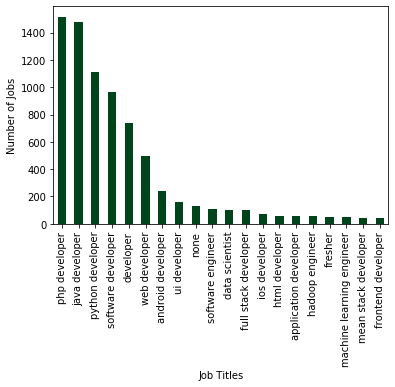

In [244]:
resume['Resume_title'].value_counts()[:20].plot(cmap='Greens_r',kind='bar')
plt.xlabel("Job Titles")
#plt.xticks(rotation=0)
plt.ylabel("Number of Jobs")